In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [3]:
# copy demo into current directory
ac.copydemo('fnc')

pgm = "fnc"
print("\nDemo %s is started"%pgm)

# run code from attr.auto in attr directory
runner = ra.runAUTO()
os.chdir("attr")
pgm = "attr"

print('\n%s : first run : Homotopy away from the folded node along the fold curve'%pgm)
r1 = ac.run(e=pgm,c=pgm,runner=runner)

print( '\n%s : second run : Homotopy away from the fold curve on the critical manifold'%pgm)
r2 = ac.run(r1('UZ1'),ICP=['va0','ha0','Ta'],DS='-',NBC=5,UZR={'ha0':-6.0},runner=runner)

print( '\n%s : third run: Actual computation of the attracting slow manifold'%pgm)
start3 = ac.load(r2('UZ1'),ICP=['Ta','va0','sa0','va1','ha1'],STOP=['UZ3'],DS='-',
              UZR = {'Ta':[56.312667620, 71.853132166, 85.797089436,
                           98.432124179, 110.04693491, 120.81663908]},runner=runner)
r3 = ac.merge( ac.run(start3,runner=runner) + ac.run(start3,DS='-',runner=runner) )
ac.save(r3,pgm)

ac.clean()

attr = ac.loadbd("attr")
os.chdir("..")

Copying demo fnc ... done

Demo fnc is started

attr : first run : Homotopy away from the folded node along the fold curve
gfortran -fopenmp -O -c attr.f90 -o attr.o
gfortran -fopenmp -O attr.o -o attr.exe /auto/lib/*.o
Starting attr ...

  BR    PT  TY  LAB       Ta         L2-NORM        MAX v         MAX h         MAX s          va0           sa0           ha0      
   1     1  EP    1   0.00000E+00   8.36518E-01  -4.90000E-01   6.17600E-01   2.79700E-01  -4.90000E-01   2.79700E-01   6.17600E-01
   1    85  UZ    2   9.00545E+01   8.63616E-01  -3.65148E-01   6.17977E-01   6.00000E-01  -3.65148E-01   6.00000E-01   5.48686E-01

 Total Time    0.104E+00
attr ... done

attr : second run : Homotopy away from the fold curve on the critical manifold
Starting attr ...

  BR    PT  TY  LAB      va0         L2-NORM        MAX v         MAX h         MAX s          ha0            Ta      
   1    78  UZ    3  -2.40803E+00   2.45567E+00  -3.76965E-01   6.28384E-01   6.00000E-01  -6.00000E+00   

In [4]:
# run code from rep.auto in rep directory
runner = ra.runAUTO()
os.chdir("rep")
pgm = "rep"

print("\nDemo %s is started"%pgm)

print('\n%s : first run : Homotopy away from the folded node along the fold curve'%pgm)
r1 = ac.run(e=pgm,c=pgm,runner=runner)

print('\n%s : second run : Homotopy away from the fold curve on the critical manifold'%pgm)
r2 = ac.run(r1('UZ1'),ICP=['vr1','Tr'],NBC=4,UZR={'vr1':0},runner=runner)

print('\n%s : third run: Actual computation of the repelling slow manifold'%pgm)
start3 = ac.load(r2('UZ1'),ICP=['Tr','sr1','vr0','hr0'],
              UZR = {'Tr':[144.10077659,160.62079695,178.59845751,
                           197.98334090,218.62796126,240.27107973]},runner=runner)
r3 = ac.merge( ac.run(start3,STOP='UZ2',runner=runner) + ac.run(start3,STOP='UZ4',DS='-',runner=runner) )
ac.save(r3,pgm)

ac.clean()

rep = ac.loadbd("rep")
os.chdir("..")


Demo rep is started

rep : first run : Homotopy away from the folded node along the fold curve
gfortran -fopenmp -O -c rep.f90 -o rep.o
gfortran -fopenmp -O rep.o -o rep.exe /auto/lib/*.o
Starting rep ...

  BR    PT  TY  LAB       Tr         L2-NORM        MAX v         MAX h         MAX s          vr1           sr1      
   1     1  EP    1   0.00000E+00   8.36518E-01  -4.90000E-01   6.17600E-01   2.79700E-01  -4.90000E-01   2.79700E-01
   1   137  UZ    2   2.03150E+02   8.44036E-01  -4.87456E-01   6.78503E-01   2.79700E-01  -5.62731E-01   5.00000E-02

 Total Time    0.123E+00
rep ... done

rep : second run : Homotopy away from the fold curve on the critical manifold
Starting rep ...

  BR    PT  TY  LAB      vr1         L2-NORM        MAX v         MAX h         MAX s           Tr      
   1    18  UZ    3  -5.82092E-08   8.30291E-01  -5.82092E-08   6.94574E-01   2.79700E-01   2.03150E+02

 Total Time    0.469E-01
rep ... done

rep : third run: Actual computation of the repelling 

In [5]:
# for plotting attracting and repelling manifolds
ac.save(ac.relabel(attr+rep),'attrrep')

runner = ra.runAUTO()
pgm = "fnc" #reinitialize
ac.delete("xis")
for i in [3,4,5,6,7,8]:
    print("calculating orbit for xi"+str(i))
    uzlabel = "UZ"+str(i-2)
    sola = attr(uzlabel)
    solr = rep(uzlabel)
    
    Ta = sola.PAR["Ta"]
    Tr = solr.PAR["Tr"]
    Tc = Ta + Tr

    # concatenate manifold coordinates and rescale t
    t = ([(ti * Ta)/Tc for ti in sola["t"][:-1]] + 
         [(ti * Tr + Ta)/Tc for ti in solr["t"]])
    v = list(sola["v"][:-1]) + list(solr["v"])
    h = list(sola["h"][:-1]) + list(solr["h"])
    s = list(sola["s"][:-1]) + list(solr["s"])
    u = [t,v,h,s]

    p = {}
    for j in ["epsilon","gamma","delta","va0","ha0"]:
        p[j] = sola.PAR[j]
    p["sr1"] = solr.PAR["sr1"]
    p["Tc"] = Tc

    rmin  = ac.run(u,e=pgm,c=pgm,PAR=p,runner=runner)
    rplus = ac.run(u,e=pgm,c=pgm+".epsplus",PAR=p,runner=runner)
    r = ac.merge(rmin+rplus)
    ac.save(r,"xi"+str(i))
    ac.append(r,"xis")

ac.relabel("xis")

Relabeling done
Saving to b.attrrep, s.attrrep, and d.attrrep ... done
calculating orbit for xi3
gfortran -fopenmp -O -c fnc.f90 -o fnc.o
gfortran -fopenmp -O fnc.o -o fnc.exe /auto/lib/*.o
Starting fnc ...

  BR    PT  TY  LAB    epsilon       L2-NORM        MAX v         MAX h         MAX s          va0           sr1            Tc      
   1    92  UZ    2   1.00000E-04   2.33626E+00   0.00000E+00   6.20470E-01   5.43254E-01  -2.41607E+00   2.33481E-01   1.49465E+04
   1   210  UZ    3   9.99986E-07   2.42117E+00   0.00000E+00   6.18071E-01   5.27532E-01  -2.41830E+00   2.42318E-01   1.37694E+06

 Total Time    0.464E+00
fnc ... done
Starting fnc ...

  BR    PT  TY  LAB    epsilon       L2-NORM        MAX v         MAX h         MAX s          va0           sr1            Tc      


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   1    91  UZ    2   5.00000E-02   2.19405E+00   1.59199E+00   1.43799E+00  -1.25067E-01  -2.99660E+00  -1.25067E-01   1.19337E+02
   1   123  LP    3   5.24827E-02   2.80480E+00   1.70038E+00   1.82876E+00  -1.40875E-01  -3.28256E+00  -1.40875E-01   1.25462E+02
   1   170  UZ    4   5.00000E-02   2.99492E+00   1.45488E+00   1.96997E+00  -1.25067E-01  -3.39108E+00  -1.25067E-01   1.40740E+02
   1   193  LP    5   4.73373E-02   2.95135E+00   1.07361E+00   1.98425E+00  -1.08063E-01  -3.40288E+00  -1.08063E-01   1.54641E+02
   1   221  UZ    6   5.00000E-02   2.97717E+00   1.14028E+00   1.97003E+00  -1.25067E-01  -3.39114E+00  -1.25067E-01   1.40742E+02
   1   281  LP    7   5.90408E-02   3.26782E+00   1.31998E+00   2.04102E+00  -1.82601E-01  -3.44372E+00  -1.82601E-01   1.09668E+02
   1   305  LP    8   5.52685E-02   3.67882E+00   8.18358E-01   2.29019E+00  -1.58591E-01  -3.64339E+00  -1.58591E-01   1.28270E+02
   1   320  UZ    9   6.00000E-02   3.58992E+00   8.81079E-01   2.20703E+00 

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


   1   154  LP    2   4.36717E-02   2.72030E+00   1.77461E+00   1.86738E+00  -8.45102E-02  -3.31456E+00  -8.45102E-02   1.73187E+02
   1   260  LP    3   4.02512E-02   2.85865E+00   1.14682E+00   2.02233E+00  -6.23179E-02  -3.43441E+00  -6.23179E-02   2.07671E+02
   1   536  LP    4   4.79850E-02   3.24839E+00   1.46733E+00   2.12507E+00  -1.12205E-01  -3.51281E+00  -1.12205E-01   1.55679E+02
   1   808  UZ    5   5.00000E-02   3.83739E+00   1.13504E+00   2.41243E+00  -1.25067E-01  -3.74481E+00  -1.25067E-01   1.53475E+02
   1   840  LP    6   5.13190E-02   4.08943E+00   1.13158E+00   2.52010E+00  -1.33469E-01  -3.83421E+00  -1.33469E-01   1.49923E+02
   1   897  EP    7   5.09678E-02   5.00181E+00   1.08345E+00   2.93437E+00  -1.31233E-01  -4.19122E+00  -1.31233E-01   1.60811E+02

 Total Time    0.235E+01
fnc ... done
Merge done
Saving to b.xi4, s.xi4, and d.xi4 ... done
Appending to b.xis, s.xis and d.xis ... done
calculating orbit for xi5
Starting fnc ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    epsilon       L2-NORM        MAX v         MAX h         MAX s          va0           sr1            Tc      
   1    93  UZ    2   1.00000E-04   2.28200E+00   0.00000E+00   6.21911E-01   5.55753E-01  -2.41430E+00   2.27799E-01   1.57851E+04
   1   239  UZ    3   9.99996E-07   2.41447E+00   0.00000E+00   6.18226E-01   5.28797E-01  -2.41812E+00   2.41701E-01   1.38567E+06

 Total Time    0.587E+00
fnc ... done
Starting fnc ...

  BR    PT  TY  LAB    epsilon       L2-NORM        MAX v         MAX h         MAX s          va0           sr1            Tc      


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   1   165  LP    2   3.84748E-02   2.62920E+00   1.81756E+00   1.89067E+00  -5.06960E-02  -3.33388E+00  -5.06960E-02   2.21220E+02
   1   301  LP    3   3.63166E-02   2.76185E+00   1.18392E+00   2.04372E+00  -3.65222E-02  -3.45219E+00  -3.65222E-02   2.57188E+02
   1   751  LP    4   4.12036E-02   3.18232E+00   1.55035E+00   2.17504E+00  -6.85218E-02  -3.55426E+00  -6.85218E-02   2.04335E+02
   1  1028  EP    5   4.00613E-02   5.00747E+00   1.38209E+00   3.09275E+00  -6.10789E-02  -4.33397E+00  -6.10789E-02   2.42509E+02

 Total Time    0.343E+01
fnc ... done
Merge done
Saving to b.xi5, s.xi5, and d.xi5 ... done
Appending to b.xis, s.xis and d.xis ... done
calculating orbit for xi6
Starting fnc ...

  BR    PT  TY  LAB    epsilon       L2-NORM        MAX v         MAX h         MAX s          va0           sr1            Tc      
   1    99  UZ    2   1.00000E-04   2.25616E+00   0.00000E+00   6.22640E-01   5.62155E-01  -2.41339E+00   2.24943E-01   1.62111E+04
   1   254  UZ    3   9.9

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    epsilon       L2-NORM        MAX v         MAX h         MAX s          va0           sr1            Tc      
   1   176  LP    2   3.53877E-02   2.53953E+00   1.84298E+00   1.90477E+00  -3.04471E-02  -3.34561E+00  -3.04471E-02   2.66754E+02
   1   336  LP    3   3.40053E-02   2.66801E+00   1.20487E+00   2.05651E+00  -2.15115E-02  -3.46276E+00  -2.15115E-02   3.02831E+02
   1   844  LP    4   3.70852E-02   3.09503E+00   1.59951E+00   2.20511E+00  -4.15697E-02  -3.57925E+00  -4.15697E-02   2.52084E+02
   1  1066  EP    5   3.66933E-02   5.00415E+00   1.51138E+00   3.17331E+00  -3.89946E-02  -4.40699E+00  -3.89946E-02   2.88608E+02

 Total Time    0.371E+01
fnc ... done
Merge done
Saving to b.xi6, s.xi6, and d.xi6 ... done
Appending to b.xis, s.xis and d.xis ... done
calculating orbit for xi7
Starting fnc ...

  BR    PT  TY  LAB    epsilon       L2-NORM        MAX v         MAX h         MAX s          va0           sr1            Tc      
   1   110  UZ    2   1

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   1   352  LP    2   3.34745E-02   2.45331E+00   1.85883E+00   1.91370E+00  -1.81202E-02  -3.35300E+00  -1.81202E-02   3.09923E+02
   1   535  LP    3   3.26039E-02   2.57844E+00   1.21725E+00   2.06431E+00  -1.26010E-02  -3.46922E+00  -1.26010E-02   3.45268E+02
   1  1081  LP    4   3.45636E-02   3.00130E+00   1.62939E+00   2.22334E+00  -2.51017E-02  -3.59452E+00  -2.51017E-02   2.97082E+02
   1  1406  EP    5   3.43605E-02   5.00535E+00   1.55785E+00   3.25866E+00  -2.37931E-02  -4.48476E+00  -2.37931E-02   3.36064E+02

 Total Time    0.460E+01
fnc ... done
Merge done
Saving to b.xi7, s.xi7, and d.xi7 ... done
Appending to b.xis, s.xis and d.xis ... done
calculating orbit for xi8
Starting fnc ...

  BR    PT  TY  LAB    epsilon       L2-NORM        MAX v         MAX h         MAX s          va0           sr1            Tc      
   1   111  UZ    2   1.00000E-04   2.20674E+00   0.00000E+00   6.24113E-01   5.75326E-01  -2.41153E+00   2.19204E-01   1.70785E+04
   1   299  UZ    3   9.9

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   1   365  LP    2   3.23039E-02   2.37224E+00   1.86849E+00   1.91938E+00  -1.07131E-02  -3.35758E+00  -1.07131E-02   3.50259E+02
   1   506  LP    3   3.17728E-02   2.49586E+00   1.22455E+00   2.06898E+00  -7.40334E-03  -3.47308E+00  -7.40334E-03   3.84161E+02
   1  1154  LP    4   3.29742E-02   2.90632E+00   1.64822E+00   2.23485E+00  -1.49422E-02  -3.60413E+00  -1.49422E-02   3.39753E+02
   1  1551  EP    5   3.28609E-02   5.00161E+00   1.58385E+00   3.33956E+00  -1.42248E-02  -4.55893E+00  -1.42248E-02   3.81441E+02

 Total Time    0.504E+01
fnc ... done
Merge done
Saving to b.xi8, s.xi8, and d.xi8 ... done


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Appending to b.xis, s.xis and d.xis ... done
Relabeling succeeded
Relabeling done


Created plot


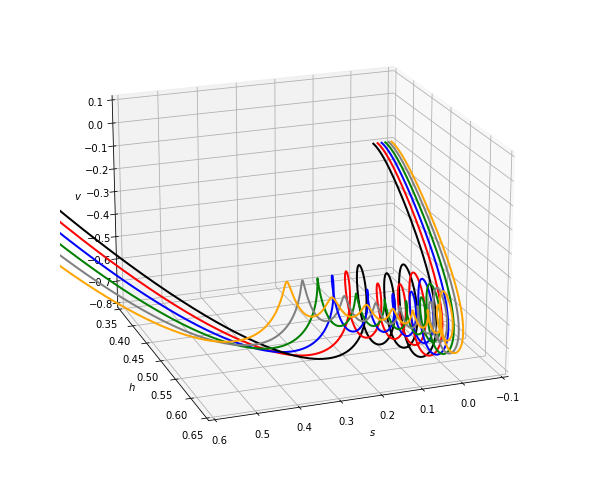

Created plot


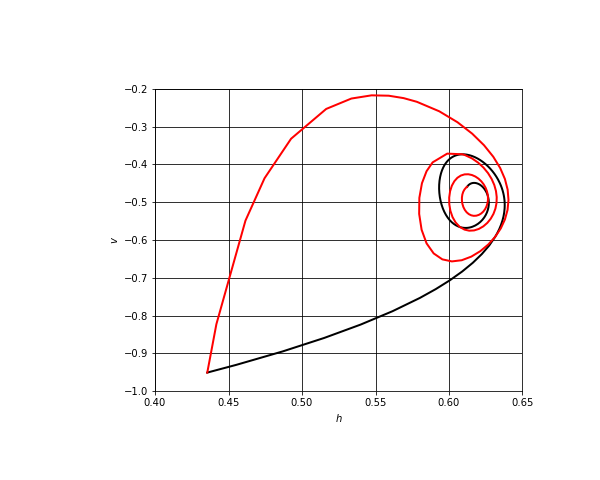

Created plot


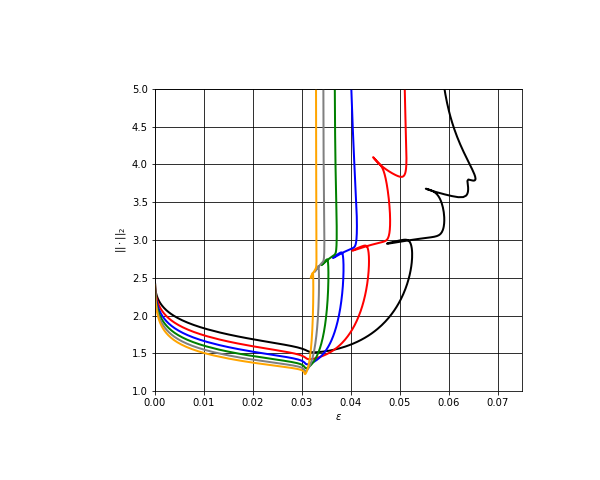

Created plot


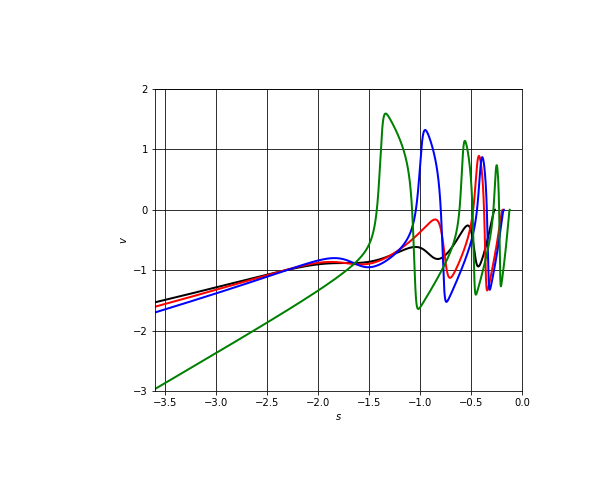

Created plot


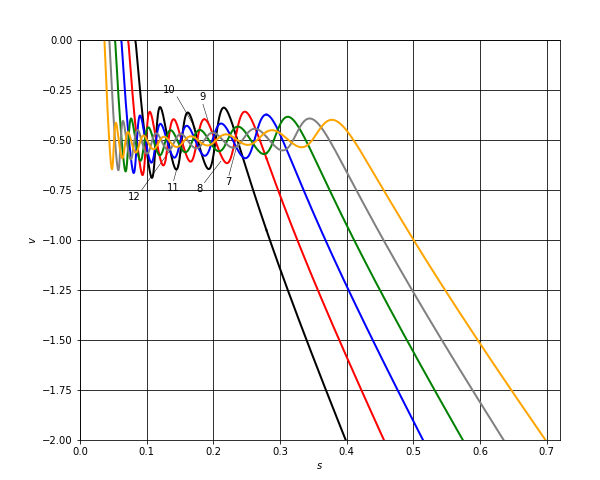

Created plot


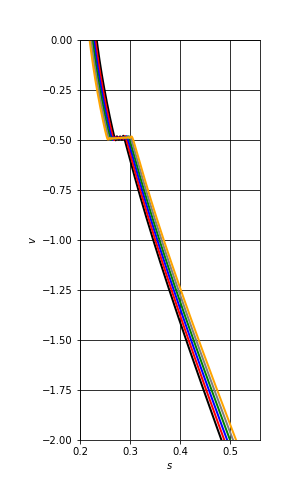

Created plot


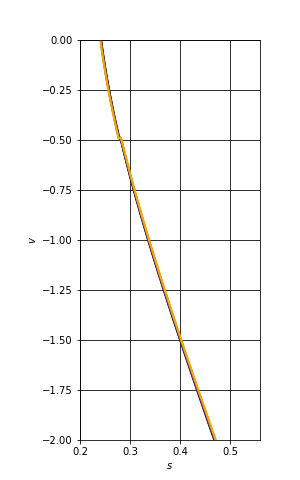

In [6]:
# make plots
# plot code from plot.auto, reproduces plots in AUTO manual
# figures saved to PNG instead of EPS for display in notebook

p=ac.plot('attrrep',type="solution",label='all',azimuth=70,elevation=20,
       minx=-0.1,maxx=0.6,miny=0.35,maxy=0.65,minz=-0.8,maxz=0.1,
       color_list="black red blue green gray orange",
       solution_x=["s"],solution_y=["h"], solution_z=["v"],
       xlabel="$s$",ylabel="$h$",zlabel="$v$")
p.savefig("fnc_attrrep1.png")
display(Image.open('fnc_attrrep1.png'))

p=ac.plot('attrrep',type="bifurcation",
       bifurcation_x=["ha1","hr0"], bifurcation_y=["va1","vr0"],
       xlabel="$h$",ylabel="$v$")
p.savefig("fnc_attrrep2.png")
display(Image.open('fnc_attrrep2.png'))


p=ac.plot('xis',type="bifurcation",
       bifurcation_x=["epsilon"], bifurcation_y=["L2-NORM"], 
       minx=0,maxx=0.075,miny=1,maxy=5,
       color_list="black red blue green gray orange",
       xlabel=r"$\varepsilon$",ylabel="$||\cdot||_2$")
p.savefig("fnc_canards1.png")
display(Image.open('fnc_canards1.png'))

p=ac.plot('xis',label=[4,8,11,16],type="solution",
       solution_x=["s"], solution_y=["v"],solution_z=None,
       color_list="black red blue green",
       minx=-3.6,maxx=0,miny=-3,maxy=2,
       xlabel="$s$",ylabel="$v$")
p.savefig("fnc_canards2.png")
display(Image.open('fnc_canards2.png'))

p=ac.plot('attrrep',type="solution",label='all',
       color_list="black red blue green gray orange",
       solution_x=["s"],solution_y=["v"], solution_z=None,
       minx=0,maxx=0.72,miny=-2,maxy=0,
       xlabel="$s$",ylabel="$v$",hide=True)
p.savefig("fnc_canards3.png")
display(Image.open('fnc_canards3.png'))

p=ac.plot('xis',label=[17,25,31,37,43,49],type="solution",
       solution_x=["s"], solution_y=["v"],solution_z=None,
       color_list="black red blue green gray orange",
       minx=0.2,maxx=0.56,miny=-2,maxy=0,
       xlabel="$s$",ylabel="$v$",width=300,hide=True)
p.savefig("fnc_canards4.png")
display(Image.open('fnc_canards4.png'))

p=ac.plot('xis',label=[18,26,32,38,44,50],type="solution",
       solution_x=["s"], solution_y=["v"],solution_z=None,
       color_list="black red blue green gray orange",
       width=300,minx=0.2,maxx=0.56,miny=-2,maxy=0,
       xlabel="$s$",ylabel="$v$",hide=True)
p.savefig("fnc_canards5.png")
display(Image.open('fnc_canards5.png'))

In [10]:
# clean up files

import glob

os.chdir("attr")
ac.delete("attr")
os.chdir("..")

os.chdir("rep")
ac.delete("rep")
os.chdir("..")

ac.delete("attrrep")
for i in [3,4,5,6,7,8]:
    ac.delete("xi"+str(i))
ac.delete("xis")

for f in glob.glob("*.png"):
    os.remove(f)
    
ac.clean()

Deleting b.attr ... done
Deleting s.attr ... done
Deleting d.attr ... done
Deleting b.rep ... done
Deleting s.rep ... done
Deleting d.rep ... done
Deleting b.attrrep ... done
Deleting s.attrrep ... done
Deleting d.attrrep ... done
Deleting b.xi3 ... done
Deleting s.xi3 ... done
Deleting d.xi3 ... done
Deleting b.xi4 ... done
Deleting s.xi4 ... done
Deleting d.xi4 ... done
Deleting b.xi5 ... done
Deleting s.xi5 ... done
Deleting d.xi5 ... done
Deleting b.xi6 ... done
Deleting s.xi6 ... done
Deleting d.xi6 ... done
Deleting b.xi7 ... done
Deleting s.xi7 ... done
Deleting d.xi7 ... done
Deleting b.xi8 ... done
Deleting s.xi8 ... done
Deleting d.xi8 ... done
Deleting b.xis ... done
Deleting s.xis ... done
Deleting d.xis ... done
